In [1]:
test_map = (
    f"bbbbbbbbbbbbbbbbb\n"
    f"bffffffsffffffffb\n"
    f"bbbbbbbbbbbbbbbbb\n"
)

In [2]:
import simpleland

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/home/brandyn/anaconda3/envs/simpleland/lib/python3.7/site-packages/pymunk/libchipmunk.so]


In [3]:
from simpleland.env import SimplelandEnv

In [4]:
import time
import pyinstrument
from pyinstrument import Profiler


In [5]:
from simpleland import gamectx

In [6]:
from IPython.display import clear_output

In [7]:
agent_map = {str(i):{} for i in range(1)}
debug = True

env = SimplelandEnv(agent_map=agent_map,dry_run=False)
done_agents = set()
start_time = time.time()
max_steps = 3000
profiler = Profiler()
profiler.start()
obs = env.reset()
dones = {"__all__":True}
episode_count = 0

for i in range(0,max_steps):
    if dones['__all__']:
        obs = env.reset()
        rewards, dones, infos = {}, {},{}
        episode_count+=1
    env.render()
    if debug:
        for id, ob in obs.items():
            print(f"Player: {id}")
            print(obs[id])
            if len(rewards)> 0:
                print(rewards[id])
                print(dones[id])
                print(infos[id])
            print(f"Episode {episode_count} Game Step:{gamectx.clock.get_time()}")
            print("----------")
        

        action = input()
#         clear_output(wait=True)
    try:
        action = int(action)
    except:
        action = None
    if action is None:
        actions = {agent_id:action_space.sample() for agent_id,action_space in env.action_spaces.items()}
    else:
        actions = {'0':action}
        
    obs, rewards, dones, infos = env.step(actions)

steps_per_sec = max_steps/(time.time()-start_time)
print(f"steps_per_sec {steps_per_sec}")
profiler.stop()
print(profiler.output_text(unicode=True, color=True,show_all=True))

grid
USING STEP CLOCK
Loading Game Content.


/home/brandyn/anaconda3/envs/simpleland/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
Episode 1 Game Step:2
----------


 1


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 33}
Episode 1 Game Step:3
----------


 2


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
1
False
{'lives_used': 0, 'energy': 37}
Episode 1 Game Step:4
----------


 2


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 36}
Episode 1 Game Step:5
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]]
0
False
{'lives_used': 0, 'energy': 35}
Episode 1 Game Step:6
----------


 2


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 34}
Episode 1 Game Step:7
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]]
0
False
{'lives_used': 0, 'energy': 33}
Episode 1 Game Step:8
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 32}
Episode 1 Game Step:9
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 31}
Episode 1 Game Step:10
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 30}
Episode 1 Game Step:11
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 29}
Episode 1 Game Step:12
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 28}
Episode 1 Game Step:13
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 27}
Episode 1 Game Step:14
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 26}
Episode 1 Game Step:15
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 25}
Episode 1 Game Step:16
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 24}
Episode 1 Game Step:17
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 23}
Episode 1 Game Step:18
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 22}
Episode 1 Game Step:19
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 21}
Episode 1 Game Step:20
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 20}
Episode 1 Game Step:21
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 19}
Episode 1 Game Step:22
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 18}
Episode 1 Game Step:23
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 17}
Episode 1 Game Step:24
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 16}
Episode 1 Game Step:25
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 15}
Episode 1 Game Step:26
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 14}
Episode 1 Game Step:27
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 13}
Episode 1 Game Step:28
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 12}
Episode 1 Game Step:29
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 11}
Episode 1 Game Step:30
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 10}
Episode 1 Game Step:31
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 9}
Episode 1 Game Step:32
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 8}
Episode 1 Game Step:33
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 7}
Episode 1 Game Step:34
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 6}
Episode 1 Game Step:35
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 5}
Episode 1 Game Step:36
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 4}
Episode 1 Game Step:37
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 3}
Episode 1 Game Step:38
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 2}
Episode 1 Game Step:39
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 0, 'energy': 1}
Episode 1 Game Step:40
----------


 0


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
-1
False
{'lives_used': 0, 'energy': 0}
Episode 1 Game Step:41
----------


 0


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]]
0
False
{'lives_used': 1, 'energy': 35}
Episode 1 Game Step:42
----------


 0


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]]
0
False
{'lives_used': 1, 'energy': 34}
Episode 1 Game Step:43
----------


 0


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 33}
Episode 1 Game Step:44
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 32}
Episode 1 Game Step:45
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 31}
Episode 1 Game Step:46
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 30}
Episode 1 Game Step:47
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 29}
Episode 1 Game Step:48
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 28}
Episode 1 Game Step:49
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 27}
Episode 1 Game Step:50
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 26}
Episode 1 Game Step:51
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 25}
Episode 1 Game Step:52
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 24}
Episode 1 Game Step:53
----------


 3


Player: 0
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 23}
Episode 1 Game Step:54
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 22}
Episode 1 Game Step:55
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 21}
Episode 1 Game Step:56
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 20}
Episode 1 Game Step:57
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 19}
Episode 1 Game Step:58
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 18}
Episode 1 Game Step:59
----------


 3


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 17}
Episode 1 Game Step:60
----------


 1


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]]
0
False
{'lives_used': 1, 'energy': 16}
Episode 1 Game Step:61
----------


 1


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]]
0
False
{'lives_used': 1, 'energy': 15}
Episode 1 Game Step:62
----------


 1


Player: 0
[[[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]]
0
False
{'lives_used': 1, 'energy': 14}
Episode 1 Game Step:63
----------


KeyboardInterrupt: 

In [7]:
obs

{'0': array([[[0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 1., 0., 0., 0.]],
 
        [[0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.]],
 
        [[0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.]],
 
        [[0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.]],
 
        [[0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.]]])}

In [9]:
env.observation_spaces['0'].contains(obs["0"])

True

In [10]:
obs["0"].shape

(5, 5, 5)

In [7]:
x = env.reset()

In [8]:
x

{'0': array([[array([1., 0., 0., 0.]), array([1., 0., 0., 0.]),
         array([1., 0., 0., 0.]), array([1., 0., 0., 0.]),
         array([1., 0., 0., 0.])],
        [array([1., 0., 0., 0.]), array([0., 0., 1., 0.]),
         array([0., 0., 1., 0.]), array([0., 0., 1., 0.]), 4],
        [array([1., 0., 0., 0.]), array([0., 0., 1., 0.]),
         array([0., 0., 0., 1.]), 4, 4],
        [array([1., 0., 0., 0.]), array([0., 0., 1., 0.]), 4, 4, 4],
        [array([1., 0., 0., 0.]), array([0., 0., 1., 0.]), 4, 4, 4]],
       dtype=object)}

In [7]:
frame = env.render()

In [8]:
import matplotlib.pyplot as plt

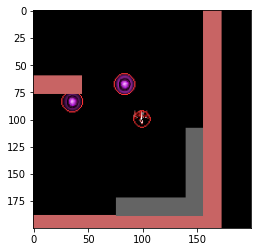

In [9]:
plt.imshow(frame)
plt.show()

In [43]:
lines = test_map.split("\n")
items=[]
for ridx,line in enumerate(lines):
    for cidx,ch in enumerate(line):
        if ch == 'f':
            items.append(('food',(ridx,cidx)))
            
        

3, 11
7, 6
7, 25
8, 41
9, 16
12, 16
14, 32


In [7]:
import pybullet

In [8]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np

In [10]:
np.array([0,1])

array([0, 1])

In [12]:
from gym import make

In [19]:
from gym import envs

In [20]:
envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [28]:
env= make("MountainCar-v0")

In [29]:
env.observation_space.sample()

array([0.5848647 , 0.01057699], dtype=float32)

In [31]:
import time

def add_numbers(x,y):
    s = []
    return x+y

start_time = time.time()
steps = 100000
result = 0
results= []
results1= []
for i in range(steps):
    env.observation_space.sample()
    env.action_space.sample()
    
    result = add_numbers(13,i)
    result = add_numbers(14,i)
    result = add_numbers(15,i)
    results.append(result)
    results1.append(i)
    
print(steps/(time.time() - start_time))


25422.28297374785


In [29]:
import pybullet as p
import time
import math
import pybullet_data

p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
#don't create a ground plane, to allow for gaps etc
p.resetSimulation()
#p.createCollisionShape(p.GEOM_PLANE)
#p.createMultiBody(0,0)
#p.resetDebugVisualizerCamera(5,75,-26,[0,0,1]);
p.resetDebugVisualizerCamera(15, -346, -16, [-15, 0, 1])

p.configureDebugVisualizer(p.COV_ENABLE_RENDERING, 0)

sphereRadius = 0.05
colSphereId = p.createCollisionShape(p.GEOM_SPHERE, radius=sphereRadius)

#a few different ways to create a mesh:

vertices = [[-0.246350, -0.246483, -0.000624], [-0.151407, -0.176325, 0.172867],
            [-0.246350, 0.249205, -0.000624], [-0.151407, 0.129477, 0.172867],
            [0.249338, -0.246483, -0.000624], [0.154395, -0.176325, 0.172867],
            [0.249338, 0.249205, -0.000624], [0.154395, 0.129477, 0.172867]]
indices = [
    0, 3, 2, 3, 6, 2, 7, 4, 6, 5, 0, 4, 6, 0, 2, 3, 5, 7, 0, 1, 3, 3, 7, 6, 7, 5, 4, 5, 1, 0, 6, 4,
    0, 3, 1, 5
]
#convex mesh from obj
stoneId = p.createCollisionShape(p.GEOM_MESH, vertices=vertices, indices=indices)

boxHalfLength = 0.5
boxHalfWidth = 2.5
boxHalfHeight = 0.1
segmentLength = 5

colBoxId = p.createCollisionShape(p.GEOM_BOX,
                                  halfExtents=[boxHalfLength, boxHalfWidth, boxHalfHeight])

mass = 1
visualShapeId = -1

segmentStart = 0

for i in range(segmentLength):
  p.createMultiBody(baseMass=0,
                    baseCollisionShapeIndex=colBoxId,
                    basePosition=[segmentStart, 0, -0.1])
  segmentStart = segmentStart - 1

for i in range(segmentLength):
  height = 0
  if (i % 2):
    height = 1
  p.createMultiBody(baseMass=0,
                    baseCollisionShapeIndex=colBoxId,
                    basePosition=[segmentStart, 0, -0.1 + height])
  segmentStart = segmentStart - 1

baseOrientation = p.getQuaternionFromEuler([math.pi / 2., 0, math.pi / 2.])

for i in range(segmentLength):
  p.createMultiBody(baseMass=0,
                    baseCollisionShapeIndex=colBoxId,
                    basePosition=[segmentStart, 0, -0.1])
  segmentStart = segmentStart - 1
  if (i % 2):
    p.createMultiBody(baseMass=0,
                      baseCollisionShapeIndex=colBoxId,
                      basePosition=[segmentStart, i % 3, -0.1 + height + boxHalfWidth],
                      baseOrientation=baseOrientation)

for i in range(segmentLength):
  p.createMultiBody(baseMass=0,
                    baseCollisionShapeIndex=colBoxId,
                    basePosition=[segmentStart, 0, -0.1])
  width = 4
  for j in range(width):
    p.createMultiBody(baseMass=0,
                      baseCollisionShapeIndex=stoneId,
                      basePosition=[segmentStart, 0.5 * (i % 2) + j - width / 2., 0])
  segmentStart = segmentStart - 1

link_Masses = [1]
linkCollisionShapeIndices = [colBoxId]
linkVisualShapeIndices = [-1]
linkPositions = [[0, 0, 0]]
linkOrientations = [[0, 0, 0, 1]]
linkInertialFramePositions = [[0, 0, 0]]
linkInertialFrameOrientations = [[0, 0, 0, 1]]
indices = [0]
jointTypes = [p.JOINT_REVOLUTE]
axis = [[1, 0, 0]]

baseOrientation = [0, 0, 0, 1]
for i in range(segmentLength):
  boxId = p.createMultiBody(0,
                            colSphereId,
                            -1, [segmentStart, 0, -0.1],
                            baseOrientation,
                            linkMasses=link_Masses,
                            linkCollisionShapeIndices=linkCollisionShapeIndices,
                            linkVisualShapeIndices=linkVisualShapeIndices,
                            linkPositions=linkPositions,
                            linkOrientations=linkOrientations,
                            linkInertialFramePositions=linkInertialFramePositions,
                            linkInertialFrameOrientations=linkInertialFrameOrientations,
                            linkParentIndices=indices,
                            linkJointTypes=jointTypes,
                            linkJointAxis=axis)
  p.changeDynamics(boxId, -1, spinningFriction=0.001, rollingFriction=0.001, linearDamping=0.0)
  print(p.getNumJoints(boxId))
  for joint in range(p.getNumJoints(boxId)):
    targetVelocity = 10
    if (i % 2):
      targetVelocity = -10
    p.setJointMotorControl2(boxId,
                            joint,
                            p.VELOCITY_CONTROL,
                            targetVelocity=targetVelocity,
                            force=100)
  segmentStart = segmentStart - 1.1

# p.configureDebugVisualizer(p.COV_ENABLE_RENDERING, 1)
# while (1):
#   camData = p.getDebugVisualizerCamera()
#   viewMat = camData[2]
#   projMat = camData[3]
#   p.getCameraImage(256,
#                    256,
#                    viewMatrix=viewMat,
#                    projectionMatrix=projMat,
#                    renderer=p.ER_BULLET_HARDWARE_OPENGL)
#   keys = p.getKeyboardEvents()
#   p.stepSimulation()
#   #print(keys)
#   time.sleep(0.01)

error: Only one local in-process GUI/GUI_SERVER connection allowed. Use DIRECT connection mode or start a separate GUI physics server (ExampleBrowser, App_SharedMemoryPhysics_GUI, App_SharedMemoryPhysics_VR) and connect over SHARED_MEMORY, UDP or TCP instead.

In [15]:
p.stepSimulation()

()

In [17]:
p.getBaseVelocity(boxId)

((0.0, 0.0, 0.0), (0.0, 0.0, 0.0))

In [18]:
linkInertialFramePositions

[[0, 0, 0]]

In [11]:
r = p.getContactPoints()

In [12]:
r

()

In [10]:
type(r[1][1])

int

In [2]:
import simpleland
from simpleland import env
from simpleland.env import SimplelandEnvSingle
from simpleland import gamectx
import time

Loading chipmunk for Linux (64bit) [/home/brandyn/anaconda3/envs/simpleland/lib/python3.7/site-packages/pymunk/libchipmunk.so]
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
env = SimplelandEnvSingle(frame_skip=6,game_tick_rate=100000000000)

Starting SL v21
Actual Physics Tick Rate is 50.0, original 60 (change due to enforcing sim_timestep size of 0.01)
Loading Game Content.
60000.0 by 60000.0


/home/brandyn/anaconda3/envs/simpleland/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [14]:
env.observation_space

Box(19,)

In [15]:
client = env.env_main.agent_clients[env.agent_id]

In [16]:
obs = []
rewards = []
dones = []
infos = []
actions = []
counts = []
ticks = []
steps = 10000
start_time = time.time()


done = True
for i in range(steps):
    if done:
        ob = env.reset()
        reward = None
        action = None
        info = None
        done = False
    else:
        action = 1
        ob, reward, done, info = env.step(action)
    actions.append(action)
    obs.append(ob)
    rewards.append(reward)
    dones.append(done)
    counts.append(i)
    infos.append(info)
    ticks.append(gamectx.clock.get_tick_counter())
#     env.render(mode="rbg_array");

    
      
time_elapsed = time.time()-start_time
steps_per_sec = steps/time_elapsed
print(f"steps_per_sec: {steps_per_sec}")
#3153,2944,2168,2848

steps_per_sec: 193.0617779148639


In [7]:
data={}
data['counts'] = counts
data['obs']=obs
data['rewards']=rewards
data['actions']=actions
data['dones']=dones
data['info']=infos
data['ticks'] = ticks

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_dict(data)

In [10]:
df[df['dones']==True]

,counts,obs,rewards,actions,dones,info,ticks
2160,2160,"[2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 108.4...",1.0,1.0,True,{'energy': 0},2161
2522,2522,"[2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 0.0, 2.0, 57.77...",1.0,1.0,True,{'energy': 0},2523
4684,4684,"[2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 2.0, 128.2...",1.0,1.0,True,{'energy': 0},4685
5046,5046,"[2.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 2.0, 177.8...",1.0,1.0,True,{'energy': 0},5047
5408,5408,"[2.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 2.0, 167.7...",1.0,1.0,True,{'energy': 0},5409
5770,5770,"[2.0, 2.0, 2.0, 0.0, 1.0, 1.0, 2.0, 2.0, 152.6...",1.0,1.0,True,{'energy': 0},5771


In [15]:
df[df['counts']<20]

,counts,obs,rewards,actions,dones,info,ticks
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",NaN,NaN,False,None,1
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},2
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},3
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},4
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},5
5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},6
6,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},7
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},8
8,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},9
9,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 3},10


In [16]:
df[df['counts']>=358]

,counts,obs,rewards,actions,dones,info,ticks
358,358,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 1},359
359,359,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 1},360
360,360,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,True,{'energy': 0},361
361,361,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",NaN,NaN,False,None,362
362,362,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 13},363
...,...,...,...,...,...,...,...
9995,9995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 13},9996
9996,9996,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 13},9997
9997,9997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 13},9998
9998,9998,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000...",1.0,1.0,False,{'energy': 13},9999


In [16]:
gamectx.clock.get_tick_counter()

10011

In [17]:
gamectx.clock.get_exact_time()

15674.029541015625